In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
titanic = sns.load_dataset("titanic")
features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

le = LabelEncoder()
titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

X = titanic[features]
y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [3]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Testing Accuracy : ", accuracy_score(y_test, y_pred_test) * 100)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train) * 100)

Testing Accuracy :  77.6536312849162
Training Accuracy :  97.75280898876404


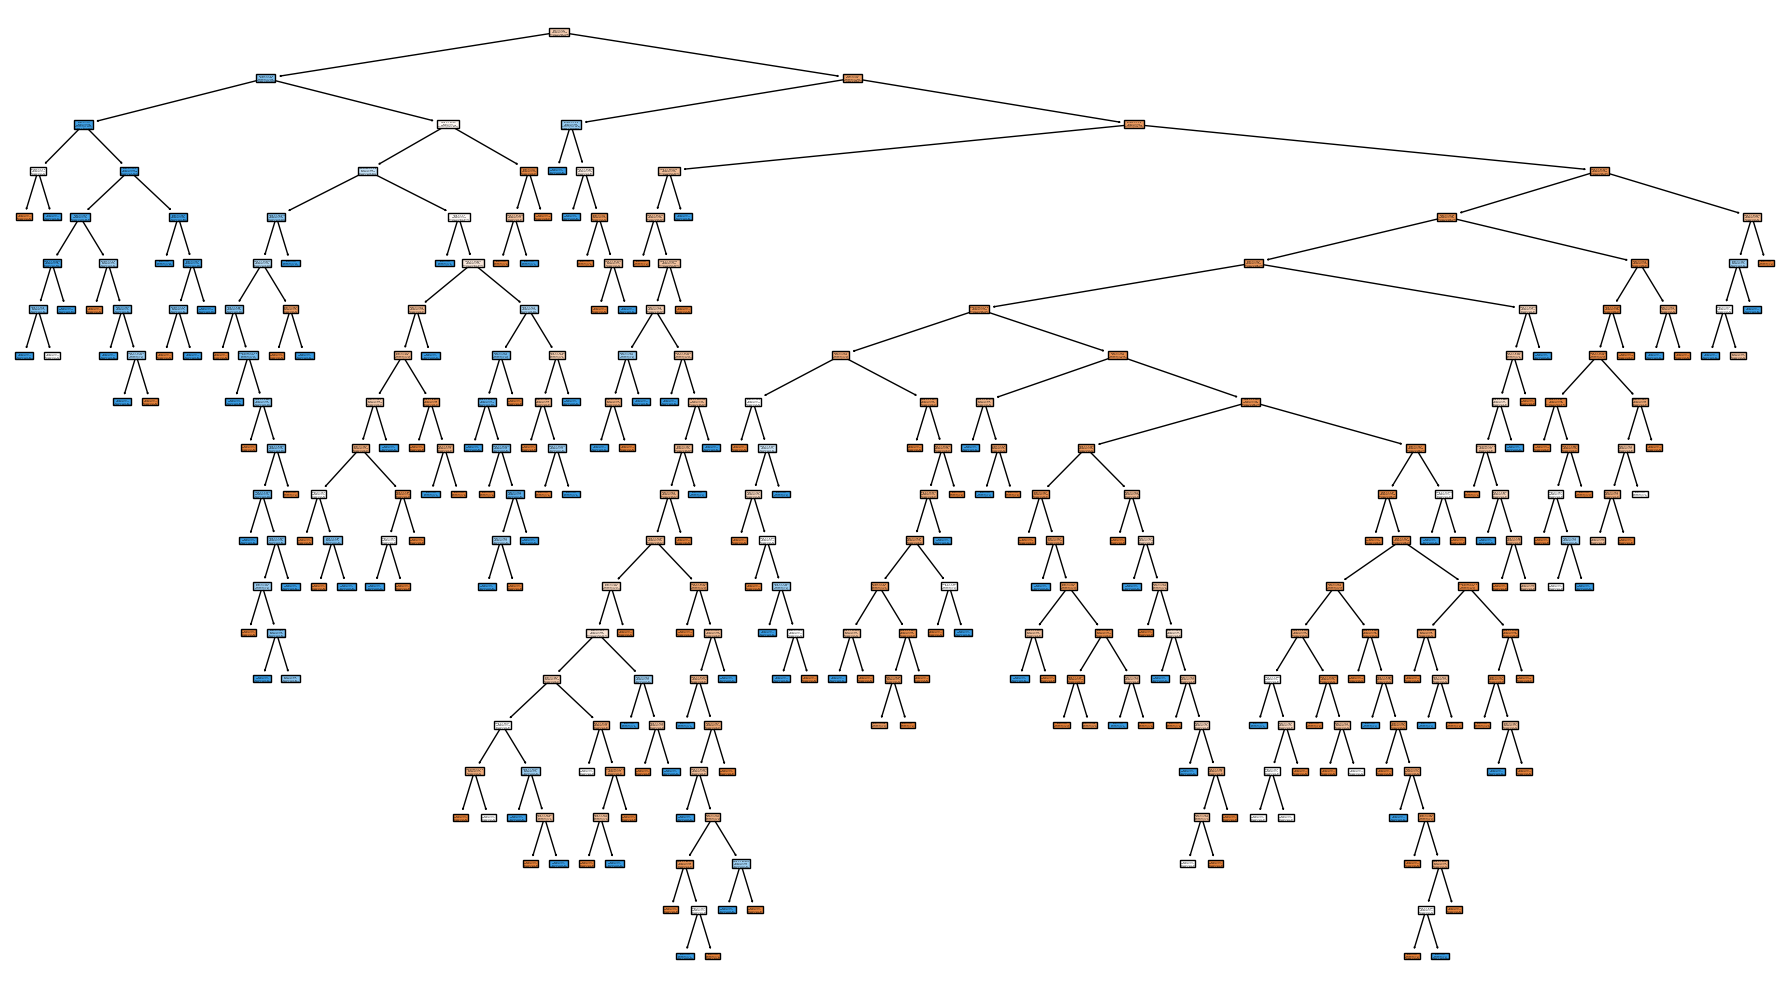

In [4]:
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died","survived"],
    filled=True
)

plt.tight_layout()
plt.show()

In [8]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 701,
    oob_score = True,
    random_state = 42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Testing Accuracy Score : ", accuracy_score(y_test, y_pred))
print("OOB Score : ", rf.oob_score_)

Testing Accuracy Score :  0.7932960893854749
OOB Score :  0.8033707865168539
